(26, 2)


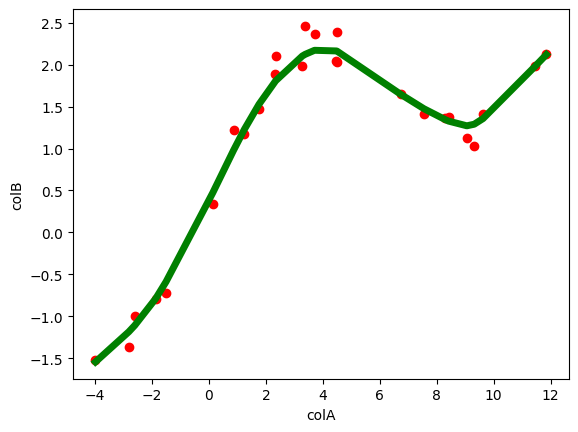

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

data1 = pd.read_csv('weightedX.csv')
data2 = pd.read_csv('weightedY.csv')
colA = np.array(data1.colA)
colB = np.array(data2.colB)
mcolA = np.mat(colA)
mcolB = np.mat(colB)

m= np.shape(mcolA)[1] #takes the shape of mcolA matrix
one = np.ones((1,m),dtype=int) # creates a identity matrix of the shape of 'm'
X= np.hstack((one.T,mcolA.T))
print(X.shape)

ypred = localWeightRegression(X,mcolB,1)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.scatter(colA,colB, color='red')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'green', linewidth=5)
plt.xlabel('colA')
plt.ylabel('colB')
plt.show();
